In [33]:
import os

import pandas as pd

from core.utils.shared import MAPPINGS_DIR

In [34]:
with open(os.path.join(MAPPINGS_DIR, 'generated/run_20250802_135757', 'dedication_mappings.csv')) as f:
    df = pd.read_csv(f)

In [35]:
# Display basic info about the data
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst few rows:")
df.head(10)


Dataset Shape: (18149, 5)

Column Names: ['id', 'schematism', 'filename', 'latin', 'polish']

First few rows:


,id,schematism,filename,latin,polish
0,34,chelmno_1871,0015.jpg,Josephus,Józef
1,36,chelmno_1871,0015.jpg,St. Birgitta,Brygida
2,38,chelmno_1871,0015.jpg,St. Nicolaum,Mikołaj Biskup
3,214,chelmno_1871,0033.jpg,ad St. Joannem,Jan Apostoł
4,215,chelmno_1871,0033.jpg,ad St. Jacobum,Jakub Większy Apostoł
5,216,chelmno_1871,0033.jpg,ad St. Mariam,Najświętsza Maria Panna
6,232,chelmno_1904,0039.jpg,S. Georgii.,Jerzy Męczennik
7,234,chelmno_1904,0043.jpg,SS. Apostolorum Simonis et Judae.,Szymon i Juda Tadeusz Apostołowie
8,235,chelmno_1904,0045.jpg,ad s. Joannem Bapt.,Jan Chrzciciel
9,236,chelmno_1904,0047.jpg,Mar. Magdalenae.,Maria Magdalena


In [45]:
# Load the JSON mapping files for comparison
import json

# Load dedication mappings JSON
with open('/Volumes/T7/AI_Osrodek/tmp/mappings/generated/run_20250802_135757/dedication.json', 'r', encoding='utf-8') as f:
    dedication_json = json.load(f)

print(f"Dedication JSON entries: {len(dedication_json)}")
print(f"CSV rows: {len(df)}")

# Show sample from JSON
print("\nSample dedication JSON entries:")
for i, (key, value) in enumerate(list(dedication_json.items())[:10]):
    print(f"{key} -> {value}")
    


Dedication JSON entries: 8461
CSV rows: 18149

Sample dedication JSON entries:
Josephus -> Józef
St. Birgitta -> Brygida
St. Nicolaum -> Mikołaj Biskup
ad St. Joannem -> Jan Apostoł
ad St. Jacobum -> Jakub Większy Apostoł
ad St. Mariam -> Najświętsza Maria Panna
S. Georgii. -> Jerzy Męczennik
SS. Apostolorum Simonis et Judae. -> Szymon i Juda Tadeusz Apostołowie
ad s. Joannem Bapt. -> Jan Chrzciciel
Mar. Magdalenae. -> Maria Magdalena


In [48]:
pol2other = {v:k for k, v in dedication_json.items()}
len(set(pol2other.keys()))

1009

In [ ]:

# Load saints mapping JSON
with open('../tmp/mappings/saints_mapping.json', 'r', encoding='utf-8') as f:
    saints_json = json.load(f)



In [37]:
# Analyze unique Polish translations in the JSON
polish_translations_dedication = list(dedication_json.values())
polish_translations_saints = list(saints_json.values())

print("=== POLISH TRANSLATIONS ANALYSIS ===")
print(f"Total dedication entries: {len(polish_translations_dedication)}")
print(f"Unique Polish dedications: {len(set(polish_translations_dedication))}")
print(f"Total saints entries: {len(polish_translations_saints)}")
print(f"Unique Polish saints: {len(set(polish_translations_saints))}")

# Combined analysis
all_polish = polish_translations_dedication + polish_translations_saints
print(f"\nCombined total entries: {len(all_polish)}")
print(f"Combined unique Polish translations: {len(set(all_polish))}")

# Most common Polish translations
from collections import Counter
polish_counts_dedication = Counter(polish_translations_dedication)
polish_counts_saints = Counter(polish_translations_saints)

print("\n=== TOP 15 MOST COMMON POLISH DEDICATIONS ===")
for polish, count in polish_counts_dedication.most_common(15):
    print(f"{polish}: {count} occurrences")
    
print("\n=== TOP 10 MOST COMMON POLISH SAINTS ===")
for polish, count in polish_counts_saints.most_common(10):
    print(f"{polish}: {count} occurrences")


=== POLISH TRANSLATIONS ANALYSIS ===
Total dedication entries: 8461
Unique Polish dedications: 1009
Total saints entries: 468
Unique Polish saints: 142

Combined total entries: 8929
Combined unique Polish translations: 1113

=== TOP 15 MOST COMMON POLISH DEDICATIONS ===
Św. Trójca: 274 occurrences
Najświętsza Maryja Panna Wniebowzięta: 216 occurrences
Mikołaj Biskup: 169 occurrences
Michał Archanioł: 133 occurrences
Narodzenie Najświętszej Maryi Panny: 133 occurrences
Stanisław Bp: 124 occurrences
Piotr i Paweł AAp: 123 occurrences
Maria Magdalena: 121 occurrences
WnNMP: 120 occurrences
Piotr i Paweł Apostołowie: 117 occurrences
Stanisław Biskup Męczennik: 110 occurrences
Marcin Biskup: 109 occurrences
NarNMP: 109 occurrences
NPNMP: 109 occurrences
Mikołaj Bp: 103 occurrences

=== TOP 10 MOST COMMON POLISH SAINTS ===
Mikołaj Biskup: 30 occurrences
Narodzenie Najświętszej Maryi Panny: 20 occurrences
Marcin Biskup: 19 occurrences
Najświętsza Maryja Panna Wniebowzięta: 18 occurrences

In [38]:
# Analyze Latin patterns and variations
latin_keys_dedication = list(dedication_json.keys())
latin_keys_saints = list(saints_json.keys())

print("=== LATIN PATTERN ANALYSIS ===")
print(f"Total Latin dedication variations: {len(latin_keys_dedication)}")
print(f"Total Latin saints variations: {len(latin_keys_saints)}")

# Analyze common Latin patterns
import re

# Extract common Latin prefixes and patterns
def analyze_latin_patterns(keys):
    patterns = {
        'St_prefix': [k for k in keys if k.startswith('St.')],
        'S_prefix': [k for k in keys if k.startswith('S.')],
        'SS_prefix': [k for k in keys if k.startswith('SS.')],
        'B_M_V': [k for k in keys if 'B. M. V' in k],
        'Tit_Ecclesiae': [k for k in keys if 'Tit. Ecclesiae' in k],
        'contains_ad': [k for k in keys if ' ad ' in k],
        'contains_E_M': [k for k in keys if 'E. M' in k],
        'contains_Ap': [k for k in keys if 'Ap' in k and 'Ap.' in k],
    }
    return patterns

dedication_patterns = analyze_latin_patterns(latin_keys_dedication)
saints_patterns = analyze_latin_patterns(latin_keys_saints)

print("\n=== DEDICATION LATIN PATTERNS ===")
for pattern, matches in dedication_patterns.items():
    print(f"{pattern}: {len(matches)} matches")
    if matches:
        print(f"  Examples: {matches[:3]}")

print("\n=== SAINTS LATIN PATTERNS ===")
for pattern, matches in saints_patterns.items():
    print(f"{pattern}: {len(matches)} matches")
    if matches:
        print(f"  Examples: {matches[:3]}")


=== LATIN PATTERN ANALYSIS ===
Total Latin dedication variations: 8461
Total Latin saints variations: 468

=== DEDICATION LATIN PATTERNS ===
St_prefix: 29 matches
  Examples: ['St. Birgitta', 'St. Nicolaum', 'St. Margaritae V. M.']
S_prefix: 1033 matches
  Examples: ['S. Georgii.', 'S. Jacobi Ap.', 'S. Laurentii M.']
SS_prefix: 154 matches
  Examples: ['SS. Apostolorum Simonis et Judae.', 'SS. Simonis et Judae apostol.', 'SS. Catharinae et Margaritae V. V. et M. M.']
B_M_V: 295 matches
  Examples: ['Assumptionis B. M. V.', 'Nativitatis B. M. V.', 'Visitationis B. M. V.']
Tit_Ecclesiae: 16 matches
  Examples: ['Tit. Ecclesiae: S. Trinitatis.', 'Tit. Ecclesiae: ber Hf. Barbara.', 'Tit. Ecclesiae: S. Catharinae V. M.']
contains_ad: 119 matches
  Examples: ['S. Mariae ad Nives.', 'Min. ad S. loan.', 'Basil. Min. ad S. Joan. Bapt.']
contains_E_M: 114 matches
  Examples: ['s. Wojtechum E. M.', 'TE. S. Wojtechus E. M.', 'TE. Maria Magd.']
contains_Ap: 469 matches
  Examples: ['S. Jacobi Ap.',

In [39]:
# Analyze abbreviations and special cases in Polish translations
print("=== POLISH ABBREVIATIONS ANALYSIS ===")

# Find entries with potential abbreviations (short words, capital letters)
def find_abbreviations(translations):
    abbrevs = []
    for trans in translations:
        # Look for short strings with mostly capitals or obvious abbreviations
        if len(trans) <= 6 and trans.isupper():
            abbrevs.append(trans)
        elif re.match(r'^[A-Z][a-z]*[A-Z]', trans):
            abbrevs.append(trans)
    return list(set(abbrevs))

dedication_abbrevs = find_abbreviations(polish_translations_dedication)
saints_abbrevs = find_abbreviations(polish_translations_saints)

print("Dedication abbreviations found:")
for abbrev in sorted(dedication_abbrevs):
    count = polish_counts_dedication[abbrev]
    print(f"  {abbrev} ({count} times)")
    
print("\nSaints abbreviations found:")
for abbrev in sorted(saints_abbrevs):
    count = polish_counts_saints[abbrev]
    print(f"  {abbrev} ({count} times)")

# Find multi-saint entries (containing periods or commas)
multi_saint_dedication = [trans for trans in set(polish_translations_dedication) if '.' in trans or ',' in trans]
multi_saint_saints = [trans for trans in set(polish_translations_saints) if '.' in trans or ',' in trans]

print(f"\nMulti-saint dedication entries: {len(multi_saint_dedication)}")
for entry in multi_saint_dedication[:5]:
    print(f"  {entry}")
    
print(f"\nMulti-saint saints entries: {len(multi_saint_saints)}")
for entry in multi_saint_saints[:5]:
    print(f"  {entry}")


=== POLISH ABBREVIATIONS ANALYSIS ===
Dedication abbreviations found:
  ChrPZbawiciel (2 times)
  JChrUkrzyżowany (9 times)
  NMP (50 times)
  NMP Bolesna (4 times)
  NMP Dobrej Rady (2 times)
  NMP Gwiazda Morza (1 times)
  NMP Królowa Anielska (4 times)
  NMP Królowa Aniołów (9 times)
  NMP Królowa Korony Polskiej (32 times)
  NMP Królowa Polski (40 times)
  NMP Królowa Polski, Józef (2 times)
  NMP Królowa Polski, Michał A (2 times)
  NMP Królowa Polski, Roch W (1 times)
  NMP Królowa Różańca Św (13 times)
  NMP Loretańska (3 times)
  NMP Matka Miłosierdzia (1 times)
  NMP Matka Miłosierdzia Ostrobramska (2 times)
  NMP Niepokalana (1 times)
  NMP Niepokalanie Poczęta (19 times)
  NMP Nieustającej Pomocy (43 times)
  NMP Nieustającej Pomocy, Józef (1 times)
  NMP Nieustającej Pomocy, Józef OblNMP (1 times)
  NMP Opieki (2 times)
  NMP Ostrobramska (2 times)
  NMP Pocieszenia (22 times)
  NMP Pocieszenia, Andrzej Bobola (1 times)
  NMP Pocieszenia, Dominik W (1 times)
  NMP Pocieszen

In [40]:
# Quality analysis - find potential issues in translations
print("=== TRANSLATION QUALITY ANALYSIS ===")

# Find entries where multiple Latin forms map to the same Polish
def find_many_to_one_mappings(mapping_dict):
    polish_to_latin = {}
    for latin, polish in mapping_dict.items():
        if polish not in polish_to_latin:
            polish_to_latin[polish] = []
        polish_to_latin[polish].append(latin)
    
    # Find Polish entries with many Latin variants
    many_variants = {polish: latin_list for polish, latin_list in polish_to_latin.items() 
                    if len(latin_list) > 5}
    return many_variants, polish_to_latin

dedication_many_variants, dedication_polish_to_latin = find_many_to_one_mappings(dedication_json)
saints_many_variants, saints_polish_to_latin = find_many_to_one_mappings(saints_json)

print("Polish entries with many Latin variants (>5):")
print(f"Dedication: {len(dedication_many_variants)} entries")
print(f"Saints: {len(saints_many_variants)} entries")

print("\nTop entries with most Latin variants (Dedications):")
sorted_variants = sorted(dedication_many_variants.items(), key=lambda x: len(x[1]), reverse=True)
for polish, latin_list in sorted_variants[:5]:
    print(f"  '{polish}' has {len(latin_list)} variants:")
    for latin in latin_list[:3]:  # Show first 3
        print(f"    {latin}")
    if len(latin_list) > 3:
        print(f"    ... and {len(latin_list)-3} more")

print("\nTop entries with most Latin variants (Saints):")
sorted_variants_saints = sorted(saints_many_variants.items(), key=lambda x: len(x[1]), reverse=True)
for polish, latin_list in sorted_variants_saints[:3]:
    print(f"  '{polish}' has {len(latin_list)} variants:")
    for latin in latin_list[:3]:
        print(f"    {latin}")
    if len(latin_list) > 3:
        print(f"    ... and {len(latin_list)-3} more")


=== TRANSLATION QUALITY ANALYSIS ===
Polish entries with many Latin variants (>5):
Dedication: 211 entries
Saints: 22 entries

Top entries with most Latin variants (Dedications):
  'Św. Trójca' has 274 variants:
    Smae Trinitatis.
    Tit. Ecclesiae: S. Trinitatis.
    Tit. Ecclesiae: SS. Trinitatis.
    ... and 271 more
  'Najświętsza Maryja Panna Wniebowzięta' has 216 variants:
    Tit. Ecclesiae: Assumptionis B. Mariae V.
    Assumptionis B. Mariae Virg.
    T. E. Assumpt. BMV.
    ... and 213 more
  'Mikołaj Biskup' has 169 variants:
    St. Nicolaum
    St. Nieolaus.
    St. Nicolai.
    ... and 166 more
  'Michał Archanioł' has 133 variants:
    St. Michaelis Archang.
    TE. S. Michael Arch.
    T. E. S. Mich. Arch.
    ... and 130 more
  'Narodzenie Najświętszej Maryi Panny' has 133 variants:
    Nativitatis B. Mariae Virg.
    TE. Nativ. BM V.
    T. E. Nativ. BMV.
    ... and 130 more

Top entries with most Latin variants (Saints):
  'Mikołaj Biskup' has 30 variants:
    S.

In [41]:
# Language detection analysis
print("=== LANGUAGE VARIATION ANALYSIS ===")

# Analyze what languages/patterns appear in the Latin keys
def detect_language_patterns(keys):
    patterns = {
        'pure_latin': [],
        'german_mixed': [],
        'polish_mixed': [],
        'has_numbers': [],
        'very_long': [],
        'contains_punctuation': []
    }
    
    for key in keys:
        if len(key) > 100:
            patterns['very_long'].append(key)
        if any(word in key.lower() for word in ['der', 'des', 'hl.', 'kirche']):
            patterns['german_mixed'].append(key)
        if any(word in key.lower() for word in ['św.', 'kościół']):
            patterns['polish_mixed'].append(key)
        if re.search(r'\d', key):
            patterns['has_numbers'].append(key)
        if len(re.findall(r'[.;,:]', key)) > 3:
            patterns['contains_punctuation'].append(key)
        if all(word in ['S.', 'St.', 'SS.', 'B.', 'M.', 'V.', 'E.', 'C.', 'Ap.', 'Bapt.'] or 
               word.isalpha() for word in key.replace(',', ' ').replace('.', ' ').split()):
            patterns['pure_latin'].append(key)
    
    return patterns

dedication_language_patterns = detect_language_patterns(latin_keys_dedication)

print("Language pattern analysis for dedications:")
for pattern, matches in dedication_language_patterns.items():
    print(f"{pattern}: {len(matches)} entries")
    if matches and len(matches) <= 3:
        print(f"  Examples: {matches}")
    elif matches:
        print(f"  Examples: {matches[:2]} ... (and {len(matches)-2} more)")

# Show some problematic entries
print("\n=== POTENTIALLY PROBLEMATIC ENTRIES ===")
print("Very long entries (>100 chars):")
for entry in dedication_language_patterns['very_long'][:3]:
    print(f"  {entry[:100]}...")
    print(f"  -> {dedication_json[entry]}")

print("\nGerman mixed entries:")
for entry in dedication_language_patterns['german_mixed'][:3]:
    print(f"  {entry}")
    print(f"  -> {dedication_json[entry]}")


=== LANGUAGE VARIATION ANALYSIS ===
Language pattern analysis for dedications:
pure_latin: 7530 entries
  Examples: ['Josephus', 'St. Birgitta'] ... (and 7528 more)
german_mixed: 26 entries
  Examples: ['des hl. Bartholomaeus.', 'TE. SS. Angeli Custodes'] ... (and 24 more)
polish_mixed: 1589 entries
  Examples: ['Św. Krzyż', 'Św. Zygmunta'] ... (and 1587 more)
has_numbers: 237 entries
  Examples: ['SS. Trinitatis (1588 S. Nicolai Episc.)', 'Immaculatae Conceptionis B. Mariae V., efenaf8 SS. Apost. Simonis et Judae.'] ... (and 235 more)
very_long: 11 entries
  Examples: ['S. Catharinae Virg. et Mart. Jm S. Nicolaus Ep. а Patron р beżzeichnet, und рат bet Schwengel auch S. Joannes Bapt.', 'N.M. P. Oczyszczenia, Zwiastowania, Szkaplerznej, Wniebowziętej, Niepokałanie Poczętej, Porcjunkuli i Konsekracji kościoła.'] ... (and 9 more)
contains_punctuation: 3204 entries
  Examples: ['B. Mariae V. et SS. Apost. Petri et Pauli.', 'Tit. Ecclesiae: S. Trinitatis.'] ... (and 3202 more)

=== POTENTI

In [42]:
# CSV vs JSON analysis
print("=== CSV vs JSON COMPARISON ===")

if 'source' in df.columns and 'target' in df.columns:
    print("CSV structure found with source/target columns")
    csv_source_target_pairs = set(zip(df['source'], df['target']))
    json_pairs = set(dedication_json.items())
    
    print(f"CSV unique pairs: {len(csv_source_target_pairs)}")
    print(f"JSON unique pairs: {len(json_pairs)}")
    
    # Find differences
    csv_only = csv_source_target_pairs - json_pairs
    json_only = json_pairs - csv_source_target_pairs
    
    print(f"Pairs only in CSV: {len(csv_only)}")
    print(f"Pairs only in JSON: {len(json_only)}")
    
    if csv_only:
        print("Sample CSV-only pairs:")
        for pair in list(csv_only)[:3]:
            print(f"  {pair[0]} -> {pair[1]}")
            
    if json_only:
        print("Sample JSON-only pairs:")
        for pair in list(json_only)[:3]:
            print(f"  {pair[0]} -> {pair[1]}")
            
else:
    print("CSV columns:", df.columns.tolist())
    print("CSV sample data:")
    print(df.head())


=== CSV vs JSON COMPARISON ===
CSV columns: ['id', 'schematism', 'filename', 'latin', 'polish']
CSV sample data:
    id    schematism  filename           latin                 polish
0   34  chelmno_1871  0015.jpg        Josephus                  Józef
1   36  chelmno_1871  0015.jpg    St. Birgitta                Brygida
2   38  chelmno_1871  0015.jpg    St. Nicolaum         Mikołaj Biskup
3  214  chelmno_1871  0033.jpg  ad St. Joannem            Jan Apostoł
4  215  chelmno_1871  0033.jpg  ad St. Jacobum  Jakub Większy Apostoł


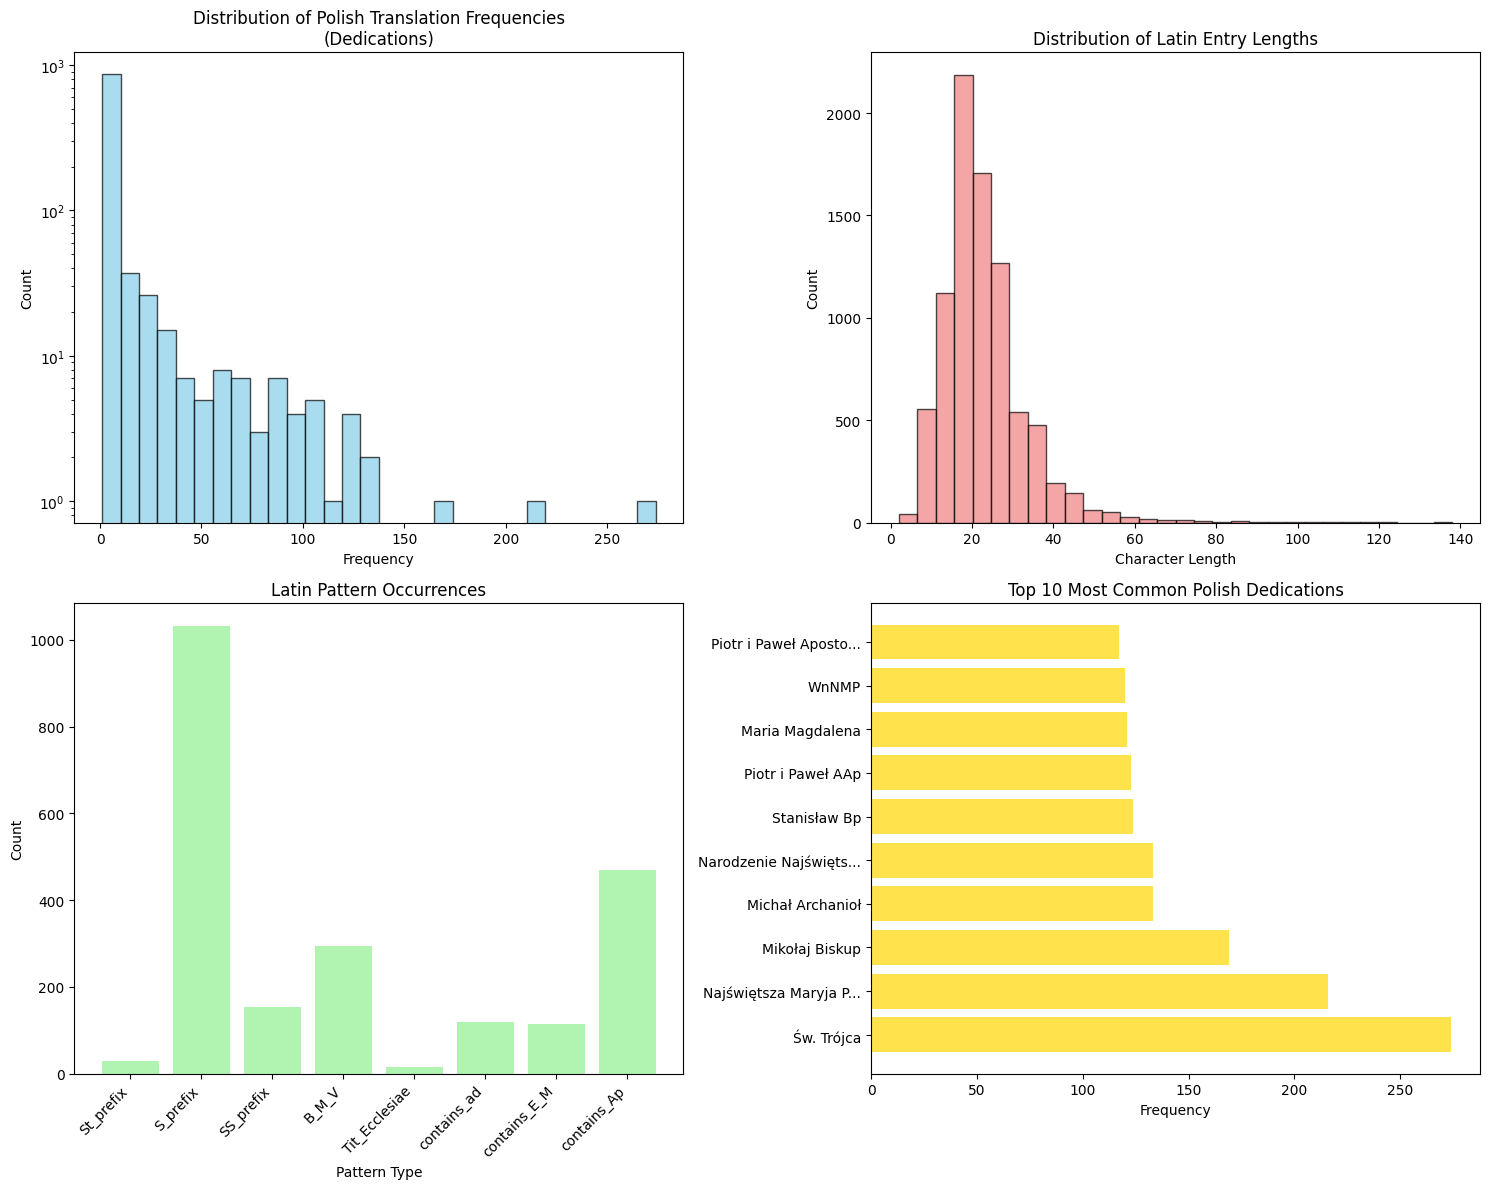


=== SUMMARY STATISTICS ===
Total Latin variations: 8461
Unique Polish translations: 1009
Compression ratio: 0.119
Average Latin entry length: 23.1 characters
Max frequency Polish entry: 274 occurrences
Entries with frequency = 1: 390
Percentage single occurrence: 38.7%


In [43]:
# Create visualization of the data patterns
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of Polish translation frequencies
polish_freq_dedication = list(polish_counts_dedication.values())
axes[0,0].hist(polish_freq_dedication, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Polish Translation Frequencies\n(Dedications)')
axes[0,0].set_xlabel('Frequency')
axes[0,0].set_ylabel('Count')
axes[0,0].set_yscale('log')

# 2. Length distribution of Latin entries
latin_lengths = [len(key) for key in latin_keys_dedication]
axes[0,1].hist(latin_lengths, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Distribution of Latin Entry Lengths')
axes[0,1].set_xlabel('Character Length')
axes[0,1].set_ylabel('Count')

# 3. Top patterns occurrence
pattern_names = list(dedication_patterns.keys())
pattern_counts = [len(matches) for matches in dedication_patterns.values()]
axes[1,0].bar(range(len(pattern_names)), pattern_counts, color='lightgreen', alpha=0.7)
axes[1,0].set_title('Latin Pattern Occurrences')
axes[1,0].set_xlabel('Pattern Type')
axes[1,0].set_ylabel('Count')
axes[1,0].set_xticks(range(len(pattern_names)))
axes[1,0].set_xticklabels(pattern_names, rotation=45, ha='right')

# 4. Top 10 most common Polish translations
top_polish = polish_counts_dedication.most_common(10)
polish_names = [item[0][:20] + '...' if len(item[0]) > 20 else item[0] for item in top_polish]
polish_counts = [item[1] for item in top_polish]
axes[1,1].barh(range(len(polish_names)), polish_counts, color='gold', alpha=0.7)
axes[1,1].set_title('Top 10 Most Common Polish Dedications')
axes[1,1].set_xlabel('Frequency')
axes[1,1].set_yticks(range(len(polish_names)))
axes[1,1].set_yticklabels(polish_names)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total Latin variations: {len(dedication_json)}")
print(f"Unique Polish translations: {len(set(dedication_json.values()))}")
print(f"Compression ratio: {len(set(dedication_json.values())) / len(dedication_json):.3f}")
print(f"Average Latin entry length: {sum(latin_lengths) / len(latin_lengths):.1f} characters")
print(f"Max frequency Polish entry: {max(polish_freq_dedication)} occurrences")
print(f"Entries with frequency = 1: {sum(1 for x in polish_freq_dedication if x == 1)}")
print(f"Percentage single occurrence: {100 * sum(1 for x in polish_freq_dedication if x == 1) / len(set(dedication_json.values())):.1f}%")


In [44]:
df

,id,schematism,filename,latin,polish
0,34,chelmno_1871,0015.jpg,Josephus,Józef
1,36,chelmno_1871,0015.jpg,St. Birgitta,Brygida
2,38,chelmno_1871,0015.jpg,St. Nicolaum,Mikołaj Biskup
3,214,chelmno_1871,0033.jpg,ad St. Joannem,Jan Apostoł
4,215,chelmno_1871,0033.jpg,ad St. Jacobum,Jakub Większy Apostoł
...,...,...,...,...,...
18144,25516,zmudz_1873,0212.jpg,SS. Apost. Petra et Pavla,Stanisław Biskup Męczennik
18145,25517,zmudz_1873,0212.jpg,S. Michaeli,Michał Archanioł
18146,25518,zmudz_1873,0212.jpg,SS. Apost. Petra et Pavla,Piotr i Paweł Apostołowie
18147,25519,zmudz_1873,0213.jpg,Св. Ioachima и Анны,Joachim i Anna
